### 🏷️ Metadata Description

| Column Name       | Description                                                  |
|-------------------|--------------------------------------------------------------|
| `id`              | Unique identifier for the house                              |
| `date`            | Date the house was sold (e.g., 20141013T000000)              |
| `price`           | Sale price (target variable)                                 |
| `bedrooms`        | Number of bedrooms                                           |
| `bathrooms`       | Number of bathrooms (can be fractional like 1.5)             |
| `sqft_living`     | Square footage of interior living space                      |
| `floors`          | Number of floors in the house                                |
| `waterfront`      | Binary indicator (1 = waterfront, 0 = no waterfront)         |
| `view`            | Quality of the view (0 to 4 scale)                           |
| `condition`       | Condition of the house (1 to 5 scale)                        |
| `grade`           | Overall grade (1 to 13) based on construction and design     |
| `yr_built`        | Year the house was originally built                          |
| `yr_renovated`    | Year the house was renovated (0 if never renovated)          |
| `zipcode`         | Zip/postal code of the house location                        |
| `lat`             | Latitude coordinate                                          |
| `long`            | Longitude coordinate                                         |
| `sqft_living15`   | Living area of the 15 nearest neighbors                      |
| `sqft_lot15`      | Lot size of the 15 nearest neighbors                         |
| `sqft_lot`        | Lot size of the house                                        |
| `sqft_above`      | Square footage of house above ground                         |
| `sqft_basement`   | Square footage of the basement                               |


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix
import streamlit as st
import joblib


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/mohamadmoselhy/Data-Science-Projects/main/LinearRegression/DataSet/kc_house_data.csv")

In [5]:
TargetColumnName='price'

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
0,7129300520,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,5650,1180,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,7242,2170,400
2,5631500400,20150225T000000,180000.0,2,1.00,770,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,10000,770,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,5000,1050,910
4,1954400510,20150218T000000,510000.0,3,2.00,1680,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,8080,1680,0


In [7]:
df.columns = df.columns.str.lower().str.strip() 
df = df.applymap(lambda x: x.lower().strip() if isinstance(x, str) else x)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_42900\1516361258.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower().strip() if isinstance(x, str) else x)


In [8]:
def drop_columns(df, columns_to_drop):
    # Ensure only columns that exist in the DataFrame are dropped
    columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]
    
    # Drop the existing columns from the DataFrame
    df.drop(columns=columns_to_drop_existing, inplace=True)
    
    return df

In [9]:
columns_to_drop = ['id', 'date', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
drop_columns(df,columns_to_drop)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated,sqft_lot,sqft_above,sqft_basement
0,221900.0,3,1.00,1180,1.0,0,0,3,7,1955,0,5650,1180,0
1,538000.0,3,2.25,2570,2.0,0,0,3,7,1951,1991,7242,2170,400
2,180000.0,2,1.00,770,1.0,0,0,3,6,1933,0,10000,770,0
3,604000.0,4,3.00,1960,1.0,0,0,5,7,1965,0,5000,1050,910
4,510000.0,3,2.00,1680,1.0,0,0,3,8,1987,0,8080,1680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,3,8,2009,0,1131,1530,0
21609,400000.0,4,2.50,2310,2.0,0,0,3,8,2014,0,5813,2310,0
21610,402101.0,2,0.75,1020,2.0,0,0,3,7,2009,0,1350,1020,0
21611,400000.0,3,2.50,1600,2.0,0,0,3,8,2004,0,2388,1600,0


In [10]:
def clean_invalid_renovations(df):
    return df[(df['yr_renovated'] != 0) & (df['yr_renovated'] < df['yr_built'])]

In [11]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated,sqft_lot,sqft_above,sqft_basement
0,221900.0,3,1.00,1180,1.0,0,0,3,7,1955,0,5650,1180,0
1,538000.0,3,2.25,2570,2.0,0,0,3,7,1951,1991,7242,2170,400
2,180000.0,2,1.00,770,1.0,0,0,3,6,1933,0,10000,770,0
3,604000.0,4,3.00,1960,1.0,0,0,5,7,1965,0,5000,1050,910
4,510000.0,3,2.00,1680,1.0,0,0,3,8,1987,0,8080,1680,0


In [12]:
print("Number of rows with renovation year earlier than the build year:", clean_invalid_renovations(df).shape[0])

Number of rows with renovation year earlier than the build year: 0


In [13]:
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x != 0 else 0)

In [14]:
df = df.rename(columns={'yr_renovated': 'renovatedornot'})

In [15]:
df.isnull().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
floors            0
waterfront        0
view              0
condition         0
grade             0
yr_built          0
renovatedornot    0
sqft_lot          0
sqft_above        0
sqft_basement     0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21613 non-null  float64
 1   bedrooms        21613 non-null  int64  
 2   bathrooms       21613 non-null  float64
 3   sqft_living     21613 non-null  int64  
 4   floors          21613 non-null  float64
 5   waterfront      21613 non-null  int64  
 6   view            21613 non-null  int64  
 7   condition       21613 non-null  int64  
 8   grade           21613 non-null  int64  
 9   yr_built        21613 non-null  int64  
 10  renovatedornot  21613 non-null  int64  
 11  sqft_lot        21613 non-null  int64  
 12  sqft_above      21613 non-null  int64  
 13  sqft_basement   21613 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.3 MB


In [17]:
df['bathrooms'] = df['bathrooms'].apply(lambda x: 1 if x < 1 else round(x))

In [18]:
df = df[(df['bedrooms'] != 0)]

In [19]:
df = df[~((df['bedrooms'] == 1) & (df['bathrooms'] > 2))]

In [20]:
df = df[df['bedrooms'] > df['bathrooms']]

In [21]:
df['floors'] = df['floors'].apply(lambda x: 1 if x < 1 else round(x))

In [22]:
df= df[~ (df['bedrooms'] > 30)]

In [23]:
df.shape

(18723, 14)

In [24]:
df[df.duplicated()]

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,renovatedornot,sqft_lot,sqft_above,sqft_basement
3951,550000.0,4,2,2410,2,0,3,4,8,1936,1,8447,2060,350
14983,585000.0,3,2,2290,2,0,0,3,9,2001,0,5089,2290,0
17242,629950.0,3,2,1680,2,0,0,3,9,2014,0,1683,1120,560
20054,555000.0,3,2,1940,2,0,0,3,8,2009,0,3211,1940,0
20524,529500.0,3,2,1410,3,0,0,3,9,2014,0,905,1410,0
21474,359800.0,5,2,2170,2,0,0,3,8,2014,0,2752,2170,0
21534,599000.0,3,2,1650,3,0,0,3,8,2014,0,1180,1650,0


In [25]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'yr_built', 'renovatedornot', 'sqft_lot',
       'sqft_above', 'sqft_basement'],
      dtype='object')

In [26]:
def plot_columns_vs_columns(df, x_col, y_col, count_col="count"):
    
    df_Temp=df
    # Group by the specified x_col and y_col to count occurrences
    count_data = df_Temp.groupby([x_col, y_col]).size().reset_index(name=count_col)

    # Drop any existing count column if it exists to avoid duplication
    df_Temp = df_Temp.drop(columns=[count_col], errors='ignore')

    # Merge the count data back to the original dataframe
    df_Temp = df_Temp.merge(count_data[[x_col, y_col, count_col]], on=[x_col, y_col], how='left')

    # Create the scatter plot with Plotly Express
    fig = px.scatter(df_Temp, x=x_col, y=y_col, 
                     hover_name=x_col, 
                     hover_data=df_Temp.columns,  # Display all columns on hover
                     title=f"{x_col} vs {y_col}",
                     labels={x_col: f"Number of {x_col.capitalize()}", 
                             y_col: f"Number of {y_col.capitalize()}"})
    # Show the plot
    fig.show()
    


In [27]:
plot_columns_vs_columns(df,'bedrooms','bathrooms')

In [28]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,renovatedornot,sqft_lot,sqft_above,sqft_basement
0,221900.0,3,1,1180,1,0,0,3,7,1955,0,5650,1180,0
1,538000.0,3,2,2570,2,0,0,3,7,1951,1,7242,2170,400
2,180000.0,2,1,770,1,0,0,3,6,1933,0,10000,770,0
3,604000.0,4,3,1960,1,0,0,5,7,1965,0,5000,1050,910
4,510000.0,3,2,1680,1,0,0,3,8,1987,0,8080,1680,0


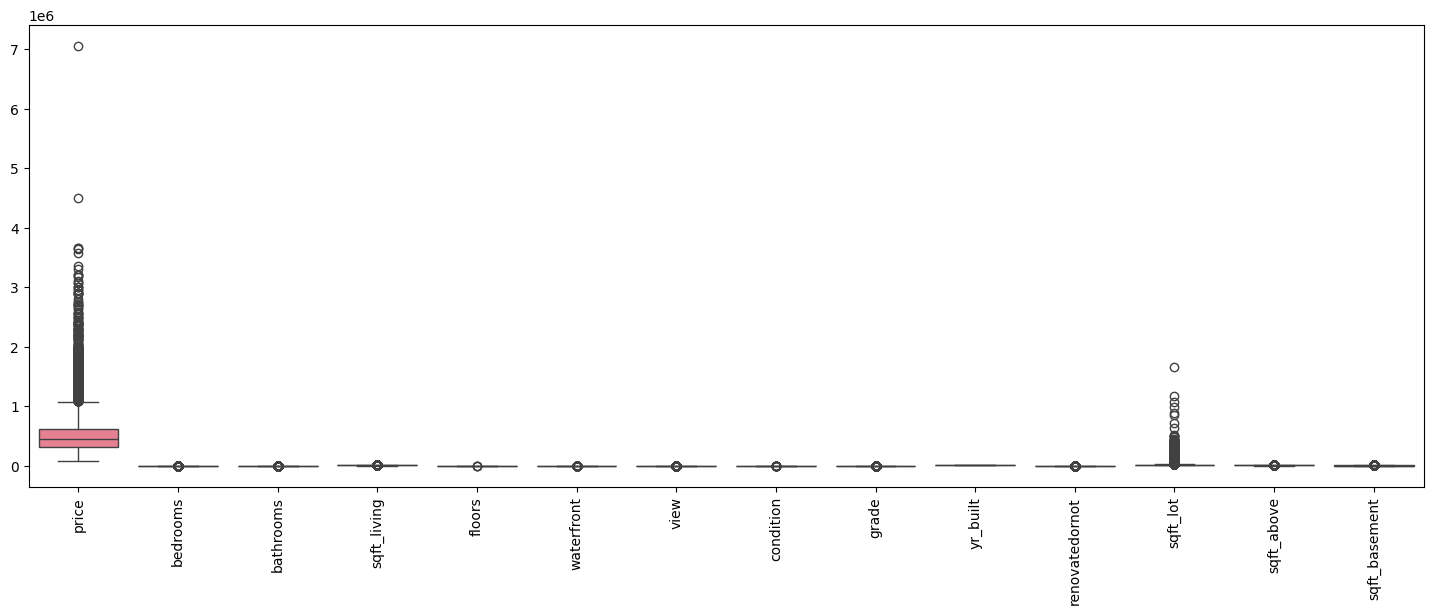

In [29]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [30]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

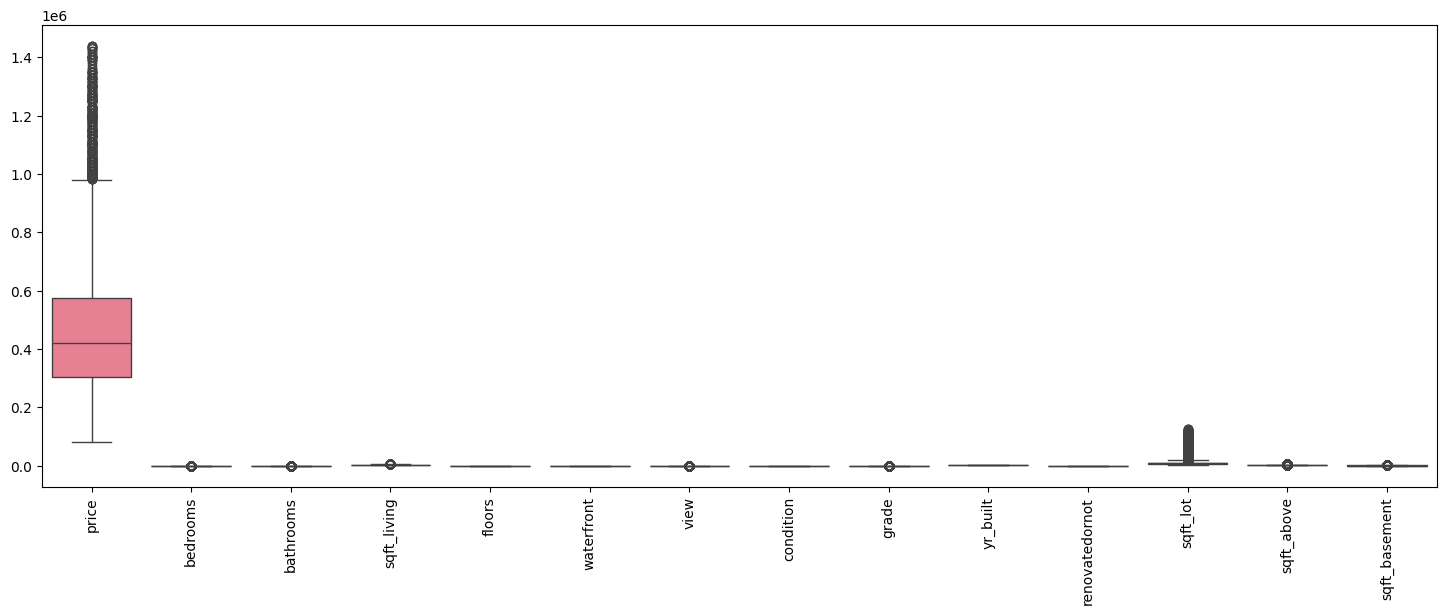

In [31]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [32]:
df.shape

(16458, 14)

In [33]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'yr_built', 'renovatedornot', 'sqft_lot',
       'sqft_above', 'sqft_basement'],
      dtype='object')

In [34]:
px.scatter(data_frame=df,x='bedrooms',y=TargetColumnName,trendline='ols',hover_name='bedrooms')

# Trial 1

In [35]:
x = df.drop(TargetColumnName, axis=1)
y = df[TargetColumnName]

In [ ]:
from src.MachineLearningLibirary import prepare_and_train_linear_regression_model

In [37]:
MyScaler, LinearRegMod, x_train, x_test, y_train, y_test=prepare_and_train_model(x,y)

In [38]:
LinearRegMod.intercept_,LinearRegMod.coef_

(np.float64(461002.23906250024),
 array([-1.22789590e+04,  1.02955273e+04,  4.12005295e+04,  2.58363642e+04,
        -2.54658516e-11,  1.16811688e+04,  1.23715368e+04,  1.01770117e+05,
        -7.98615652e+04, -2.72848411e-12, -4.81835241e+03,  2.88766172e+04,
         2.32442259e+04]))

In [39]:
y_predict=LinearRegMod.predict(MyScaler.transform(x_test))

In [40]:
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2 Score: {r2:.2f}')

MSE: 20542612347.93
MAE: 108414.08
R2 Score: 0.54


# Trial 2

In [47]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'yr_built', 'renovatedornot', 'sqft_lot',
       'sqft_above', 'sqft_basement'],
      dtype='object')

In [ ]:
columns_to_drop = ['waterfront','view','condition', 'grade','sqft_lot','sqft_above']
drop_columns(df,columns_to_drop)

,price,bedrooms,bathrooms,sqft_living,floors,yr_built,renovatedornot,sqft_basement
0,221900.0,3,1,1180,1,1955,0,0
2,180000.0,2,1,770,1,1933,0,0
3,604000.0,4,3,1960,1,1965,0,910
4,510000.0,3,2,1680,1,1987,0,0
6,257500.0,3,2,1715,2,1995,0,0
...,...,...,...,...,...,...,...,...
21608,360000.0,3,2,1530,3,2009,0,0
21609,400000.0,4,2,2310,2,2014,0,0
21610,402101.0,2,1,1020,2,2009,0,0
21611,400000.0,3,2,1600,2,2004,0,0


# Model

In [40]:
def get_user_input(df):
    data = {}
    df_Temp=df.drop(columns=TargetColumnName)
    # Iterate over each column in the DataFrame
    for field in df_Temp.columns:
        while True:
            try:
                value = float(input(f"Enter value for {field.replace('_', ' ').title()}: "))
                data[field] = value
                break
            except ValueError:
                print("Please enter a valid number.")
    return data


In [41]:
get_user_input=get_user_input(df)

In [42]:
get_user_input

{'bedrooms': 2.0,
 'bathrooms': 6.0,
 'sqft_living': 6.0,
 'floors': 6.0,
 'waterfront': 5.0,
 'view': 2.0,
 'condition': 2.0,
 'grade': 2.0,
 'yr_built': 2.0,
 'renovatedornot': 2.0,
 'sqft_lot': 2.0,
 'sqft_above': 2.0,
 'sqft_basement': 2.0}

In [ ]:
def predict(user_input,MyScaler,Model):
    # Convert dict to 2D array if needed
    input_array = np.array([list(user_input.values())])
    input_array=MyScaler.transform(input_array)
    result = Model.predict(input_array)
    return result

In [44]:
user_input_data = get_user_input  # Assuming get_user_input is a dictionary or an appropriate data structure
prediction_result = predict(user_input_data)

# If the result is a single value within an array, extract it:
scalar_result = prediction_result[0] if isinstance(prediction_result, np.ndarray) else prediction_result

# Formatting the prediction result with $ and commas
formatted_result = "${:,.2f}".format(scalar_result)

print("Prediction result:", formatted_result)

NameError: name 'MySclaer' is not defined

In [ ]:
joblib.dump(LinearRegMod, 'model.pkl')
joblib.dump(MySclaer, 'scaler.pkl')

['scaler.pkl']

In [ ]:

# Assuming your model and prediction function are already available
# For example: from your_model_file import model, predict_function

# Title of the web app
st.title("Real Estate Price Prediction")

# Collect input data from user
st.subheader("Enter the property details:")

# Create inputs for all required features
bedrooms = st.number_input("Number of Bedrooms:", min_value=1, max_value=50, value=3)
bathrooms = st.number_input("Number of Bathrooms:", min_value=1, max_value=10, value=2)
sqft_living = st.number_input("Square Footage of Living Area (sqft):", min_value=200, max_value=10000, value=2000)
floors = st.number_input("Number of Floors:", min_value=1, max_value=5, value=2)
waterfront = st.selectbox("Waterfront (1 = Yes, 0 = No):", [0, 1])
view = st.selectbox("View Quality (0 to 4):", [0, 1, 2, 3, 4])
condition = st.selectbox("Condition (1 to 5):", [1, 2, 3, 4, 5])
grade = st.selectbox("Grade (1 to 13):", [i for i in range(1, 14)])
yr_built = st.number_input("Year Built:", min_value=1900, max_value=2025, value=2000)
renovatedornot = st.selectbox("Renovated or not (1 = Yes, 0 = No) :", [0, 1])
sqft_lot = st.number_input("Lot Size (sqft):", min_value=500, max_value=100000, value=5000)
sqft_above = st.number_input("Square Footage of Area Above Ground (sqft):", min_value=100, max_value=10000, value=1500)
sqft_basement = st.number_input("Square Footage of Basement (sqft):", min_value=0, max_value=5000, value=500)

# Create the feature array for prediction
user_input = {
    'bedrooms': bedrooms,
    'bathrooms': bathrooms,
    'sqft_living': sqft_living,
    'floors': floors,
    'waterfront': waterfront,
    'view': view,
    'condition': condition,
    'grade': grade,
    'yr_built': yr_built,
    'renovatedornot':renovatedornot,
    'sqft_lot': sqft_lot,
    'sqft_above': sqft_above,
    'sqft_basement': sqft_basement
}

# Make a prediction based on user input
# Assuming you have a prediction function (e.g., model.predict())
prediction = predict(user_input)  # Replace `predict()` with your actual prediction method

# Display the prediction result
st.subheader("Prediction Result:")
st.write(f"The estimated price for a property with the following details:")
st.write(f"- {bedrooms} bedrooms")
st.write(f"- {bathrooms} bathrooms")
st.write(f"- {sqft_living} sqft of living area")
st.write(f"- {floors} floors")
st.write(f"- Waterfront: {'Yes' if waterfront == 1 else 'No'}")
st.write(f"- View Quality: {view}")
st.write(f"- Condition: {condition}")
st.write(f"- Grade: {grade}")
st.write(f"- Built in {yr_built}")
st.write(f"-Renovated {'Yes' if renovatedornot == 1 else 'No'}")
st.write(f"- Lot Size: {sqft_lot} sqft")
st.write(f"- {sqft_above} sqft of area above ground")
st.write(f"- {sqft_basement} sqft of basement")

st.write(f"The estimated price of this property is: ${prediction[0]:,.2f}")


2025-04-08 02:41:56.863 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 02:41:56.864 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 02:41:56.864 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 02:41:56.865 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 02:41:56.866 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 02:41:56.866 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 02:41:56.867 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 02:41:56.867 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar